Question 2: \\

**a** \\
$\prod_{i=1}^n \left[P(Y_i = 1 ~|~ X_i)^{Y_i}(P(Y_i = 0 ~|~ X_i))^{1 - Y_i}\right] = \\$
$\\$
$\\$
$\prod_{i=1}^n \left[P(Y_i = 1 ~|~ X_i)^{Y_i}(1 - P(Y_i = 1 ~|~ X_i))^{1 - Y_i}\right]. \\$   
Taking the log of the entire product, a summation is produced: \\

$\sum_{i=1}^n \left[Y_i \log\{P(Y_i = 1 ~|~ X_i)\} + (1 - Y_i) \log\{1 - P(Y_i = 1 ~|~ X_i)\}\right]. \\$ 
$\\$ \\
**b/c** \\
Plug in equation for $P(Y_i = 1 ~|~ X_i)$. Sum becomes \\

$\sum_{i=1}^n \left[Y_i \log{(e^{(\beta_0(1 - X_i) + \beta_1X_i)})} - \log\{1 + (e^{(\beta_0(1 - X_i) + \beta_1X_i)})\}\right]. \\$ \\
Let $X_i = 0$. Sum becomes: \\

$\sum_{i=1}^n \left[Y_i \beta_0 - \log{(1 + e^{\beta_0})}\right] \\$ \\

$\dfrac{\partial}{\partial\beta_0} \sum_{i=1}^n \left[Y_i \beta_0 - \log{(1 + e^{\beta_0})}\right] = \sum_{i=1}^n \left[Y_i - \dfrac{e^{\hat{\beta_0}}}{(1 + e^{\hat{\beta_0}})}\right] = 0\\$ \\

$\sum_{i=1}^n \left[Y_i \right] = \sum_{i=1}^n \left[\dfrac{e^{\hat{\beta_0}}}{(1 + e^{\hat{\beta_0}})}\right] = n\dfrac{e^{\hat{\beta_0}}}{(1 + e^{\hat{\beta_0}})}\\$ \\

Dividing over the n: \\

$\dfrac{1}{n}\sum_{i=1}^n \left[Y_i \right] = \bar{Y_0} = \dfrac{e^{\hat{\beta_0}}}{(1 + e^{\hat{\beta_0}})}\\ $ \\

Solving for $\hat{\beta_0}$, we get $\hat{\beta_0} = \log{(\dfrac{\bar{Y_0}}{1 - \bar{Y_0}})}$

Let $X_i = 1$. Sum becomes: \\

$\sum_{i=1}^n \left[Y_i \beta_1 - \log{(1 + e^{\beta_1})}\right] \\$ \\

$\dfrac{\partial}{\partial\beta_1} \sum_{i=1}^n \left[Y_i \beta_1 - \log{(1 + e^{\beta_1})}\right] = \sum_{i=1}^n \left[Y_i - \dfrac{e^{\hat{\beta_1}}}{(1 + e^{\hat{\beta_1}})}\right] = 0\\$ \\

$\sum_{i=1}^n \left[Y_i \right] = \sum_{i=1}^n \left[\dfrac{e^{\hat{\beta_1}}}{(1 + e^{\hat{\beta_1}})}\right] = n\dfrac{e^{\hat{\beta_1}}}{(1 + e^{\hat{\beta_1}})}\\$ \\

Dividing over the n: \\

$\dfrac{1}{n}\sum_{i=1}^n \left[Y_i \right] = \bar{Y_1} = \dfrac{e^{\hat{\beta_1}}}{(1 + e^{\hat{\beta_1}})}\\ $ \\

Solving for $\hat{\beta_1}$, we get $\hat{\beta_1} = \log{(\dfrac{\bar{Y_1}}{1 - \bar{Y_1}})}$


Probability of o-ring failure at 74 degrees:
0.107061826026118


,Date,Value
0,2019-09-12,3.56
1,2019-09-05,3.49
2,2019-08-29,3.58
3,2019-08-22,3.55
4,2019-08-15,3.60
5,2019-08-08,3.60
6,2019-08-01,3.75
7,2019-07-25,3.75
8,2019-07-18,3.81
9,2019-07-11,3.75


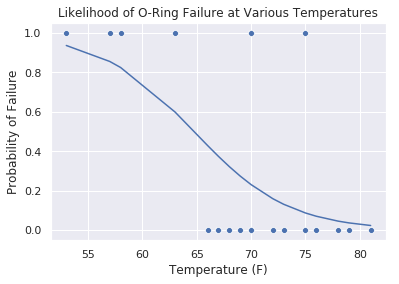

In [52]:
# Casey Weiner, cweiner6@jhu.edu, caseypw

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
sns.set()

#Question 1

! if [ ! -e orings.csv ] ; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv; \
fi
  
data = pd.read_csv("orings.csv")

data

x = data.Temperature

y = data.Total

y[y == 0] = 0 
y[y > 0] = 1

#a
sns.scatterplot(x,y)
plt.ylabel('Probability of Failure')
plt.xlabel('Temperature (F)')
plt.title('Likelihood of O-Ring Failure at Various Temperatures')

x = data[["Temperature"]]

#b
X = np.column_stack((x, y))
logreg = LogisticRegression(C=1.0, fit_intercept=True, solver='lbfgs')
fit = logreg.fit(x, y)

beta1 = fit.intercept_[0]
beta2 = fit.coef_[0]

y2 = (beta2 * x) + beta1
p = 1 / (1 + np.exp(-y2))

#c
plt.plot(x,p)

#d
print('Probability of o-ring failure at 74 degrees:')
print(float(1 / (1 + np.exp(-((beta2 * 74) + beta1)))))

#Question 3
! if [ ! -e FMAC-30US.csv ] ; \
then wget https://raw.githubusercontent.com/caseypw/BiomedicalDataScience/master/FMAC-30US.csv; \
fi
  
data2 = pd.read_csv("FMAC-30US.csv")

data2.head(10) #Freddie mac indices for 30-year fixed mortgage plan for homes. This will
# be correlated with two other data sets,
